<h1>knnStudy<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#createDataSet()-函数,创建数据集和标签" data-toc-modified-id="createDataSet()-函数,创建数据集和标签-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>createDataSet() 函数,创建数据集和标签</a></span></li><li><span><a href="#classify0()-函数,k-近邻算法" data-toc-modified-id="classify0()-函数,k-近邻算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>classify0() 函数,k-近邻算法</a></span></li><li><span><a href="#将文本记录到转换NumPy的解析程序" data-toc-modified-id="将文本记录到转换NumPy的解析程序-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>将文本记录到转换NumPy的解析程序</a></span></li><li><span><a href="#分析数据:使用-Matplotlib-创建散点图" data-toc-modified-id="分析数据:使用-Matplotlib-创建散点图-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>分析数据:使用 Matplotlib 创建散点图</a></span></li><li><span><a href="#准备数据:归一化数值" data-toc-modified-id="准备数据:归一化数值-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>准备数据:归一化数值</a></span></li><li><span><a href="#分类器针对约会网站的测试代码" data-toc-modified-id="分类器针对约会网站的测试代码-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>分类器针对约会网站的测试代码</a></span></li></ul></div>

# createDataSet() 函数,创建数据集和标签

In [1]:
from numpy import *  # 科学计算包NumPy
import operator  # 运算符模块，k-近邻算法执行排序操作时将使用这个模块提供的函数


def creatDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [2]:
group, labels = creatDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


# classify0() 函数,k-近邻算法  
对未知类别属性的数据集中的每个点依次执行以下操作:
(1) 计算已知类别数据集中的点与当前点之间的距离;  
(2) 按照距离递增次序排序;  
(3) 选取与当前点距离最小的k个点;  
(4) 确定前k个点所在类别的出现频率;  
(5) 返回前k个点出现频率最高的类别作为当前点的预测分类。  

In [3]:
def classify0(inX, dataSet, labels, k):
    """k-近邻算法"""

    # 距离计算
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()

    # 选择距离最小的K个点
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    # 排序
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True)

    return sortedClassCount[0][0]

In [4]:
classify0([0,0],group,labels,3)

'B'

In [5]:
inX, dataSet, labels, k = [0, 0], group, labels, 3
# 距离计算
dataSetSize = dataSet.shape[0]
diffMat = tile(inX, (dataSetSize, 1)) - dataSet
sqDiffMat = diffMat**2
sqDistances = sqDiffMat.sum(axis=1)
distances = sqDistances**0.5
sortedDistIndicies = distances.argsort()

# 选择距离最小的K个点
classCount = {}
for i in range(k):
    voteIlabel = labels[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

# 排序
sortedClassCount = sorted(
    classCount.items(), key=operator.itemgetter(1), reverse=True)

In [6]:
print(classCount)
print(sortedClassCount)

{'B': 2, 'A': 1}
[('B', 2), ('A', 1)]


# 将文本记录到转换NumPy的解析程序  
海伦收集约会数据已经有了一段时间,她把这些数据存放在文本文件datingTestSet2.txt中,每个样本数据占据一行,总共有1000行。海伦的样本主要包含以下3种特征:  
 每年获得的飞行常客里程数  
 玩视频游戏所耗时间百分比  
 每周消费的冰淇淋公升数  

In [7]:
def file2matrix(filename):
    """将文本记录到转换NumPy的解析程序"""
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)  # 得到文件行数
    returnMat = zeros((numberOfLines, 3))  # 创建返回的Numpy矩阵
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()  # 截取掉所有的回车字符
        listFromLine = line.split('\t')  # 然后使用tab字符\t将上一步得到的整行数据分割成一个元素列表
        returnMat[index, :] = listFromLine[0:3]  # 选取前3个元素，将它们存储到特征矩阵中
        # 将列表的最后一列存储到向量classLabelVector中
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [9]:
datingDataMat, datingLabels = file2matrix(
    "/media/tianming/文档/postgraduateStudy/搜集的资料/《机器学习实战》完整资源/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt")

In [10]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

In [11]:
fr = open("/media/tianming/文档/postgraduateStudy/搜集的资料/《机器学习实战》完整资源/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt")
arrayOLines = fr.readlines()

In [12]:
arrayOLines

['40920\t8.326976\t0.953952\t3\n',
 '14488\t7.153469\t1.673904\t2\n',
 '26052\t1.441871\t0.805124\t1\n',
 '75136\t13.147394\t0.428964\t1\n',
 '38344\t1.669788\t0.134296\t1\n',
 '72993\t10.141740\t1.032955\t1\n',
 '35948\t6.830792\t1.213192\t3\n',
 '42666\t13.276369\t0.543880\t3\n',
 '67497\t8.631577\t0.749278\t1\n',
 '35483\t12.273169\t1.508053\t3\n',
 '50242\t3.723498\t0.831917\t1\n',
 '63275\t8.385879\t1.669485\t1\n',
 '5569\t4.875435\t0.728658\t2\n',
 '51052\t4.680098\t0.625224\t1\n',
 '77372\t15.299570\t0.331351\t1\n',
 '43673\t1.889461\t0.191283\t1\n',
 '61364\t7.516754\t1.269164\t1\n',
 '69673\t14.239195\t0.261333\t1\n',
 '15669\t0.000000\t1.250185\t2\n',
 '28488\t10.528555\t1.304844\t3\n',
 '6487\t3.540265\t0.822483\t2\n',
 '37708\t2.991551\t0.833920\t1\n',
 '22620\t5.297865\t0.638306\t2\n',
 '28782\t6.593803\t0.187108\t3\n',
 '19739\t2.816760\t1.686209\t2\n',
 '36788\t12.458258\t0.649617\t3\n',
 '5741\t0.000000\t1.656418\t2\n',
 '28567\t9.968648\t0.731232\t3\n',
 '6808\t1.36483

# 分析数据:使用 Matplotlib 创建散点图

<function matplotlib.pyplot.show(close=None, block=None)>

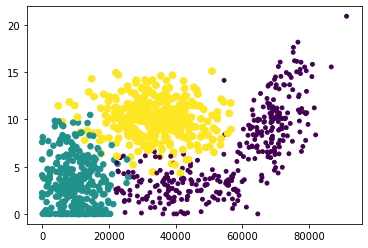

In [13]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show

# 准备数据:归一化数值
在函数autoNorm() 中,我们将每列的最小值放在变量minVals 中,将最大值放在变maxVals 中,其中 dataSet.min(0) 中的参数0使得函数可以从列中选取最小值,而不是选取当前行的最小值。然后,函数计算可能的取值范围,并创建新的返回矩阵。

In [14]:
def autoNorm(dataSet):
    """归一化特征值"""
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet / tile(ranges,(m,1))
    return normDataSet, ranges, minVals

In [15]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [16]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

# 分类器针对约会网站的测试代码
&emsp;函数 datingClassTest首先使用了 file2matrix 和 autoNorm() 函数从文件中读取数据并将其转换为归一化特征值。接着计算测试向量的数量,此步决定了normMat 向量中哪些数据用于测试,哪些数据用于分类器的训练样本;然后将这两部分数据输入到原始kNN分类器函数classify0 。最后,函数计算错误率并输出结果。

In [19]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix(
        "/media/tianming/文档/postgraduateStudy/搜集的资料/《机器学习实战》完整资源/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt")
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(
            normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with:%d,the real answer is:%d" %
              (classifierResult, datingLabels[i]))
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is:%f" % (errorCount/float(numTestVecs)))

In [20]:
datingClassTest()

the classifier came back with:3,the real answer is:3
the classifier came back with:2,the real answer is:2
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:3,the real answer is:3
the classifier came back with:3,the real answer is:3
the classifier came back with:1,the real answer is:1
the classifier came back with:3,the real answer is:3
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:2,the real answer is:2
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:2,the real answe